<a href="https://colab.research.google.com/github/robert-myers/myanimelist-recommender/blob/master/notebooks/show_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install jikanpy && pip install surprise

In [0]:
import dill as pickle
import urllib.request

from jikanpy import Jikan
from PIL import Image

In [0]:
jikan = Jikan()

In [4]:
%%time
with open('/content/drive/My Drive/jars/recommender.pickle', 'rb') as f:
  malr = pickle.load(f)

CPU times: user 1min 19s, sys: 15.3 s, total: 1min 35s
Wall time: 1min 36s


In [0]:
def show_me(user, randomize=False, filter_completed=True):
  if randomize:
    recommendations = malr.get_recommendations(user, num_titles=20, filter_completed=filter_completed)
    url = recommendations.sample()["image_url"].iloc[0]
  else:
    url = malr.get_recommendations(user, num_titles=1, filter_completed=filter_completed)["image_url"].iloc[0]
  image = Image.open(urllib.request.urlopen((url)))
  return image

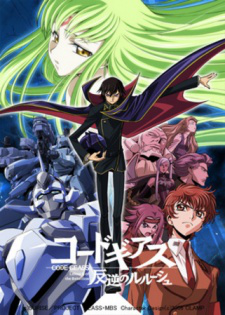

In [6]:
# an empty string for user is considered to be a cold start recommendation
show_me("", randomize=True, filter_completed=False)

In [7]:
malr.get_recommendations("", 98, filter_completed=False).reset_index(drop=True)

,title,image_url
0,Kimi no Na wa.,https://myanimelist.net/images/anime/5/87048.jpg
1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/images/anime/5/47421.jpg
2,Steins;Gate,https://myanimelist.net/images/anime/5/73199.jpg
3,Death Note,https://myanimelist.net/images/anime/9/9453.jpg
4,Sen to Chihiro no Kamikakushi,https://myanimelist.net/images/anime/6/79597.jpg
...,...,...
93,Trigun,https://myanimelist.net/images/anime/7/20310.jpg
94,Mob Psycho 100,https://myanimelist.net/images/anime/8/80356.jpg
95,Shingeki no Kyojin Season 2,https://myanimelist.net/images/anime/4/84177.jpg
96,Violet Evergarden,https://myanimelist.net/images/anime/1329/9061...
